# *MNIST 데이터셋 분석 모델 만들기

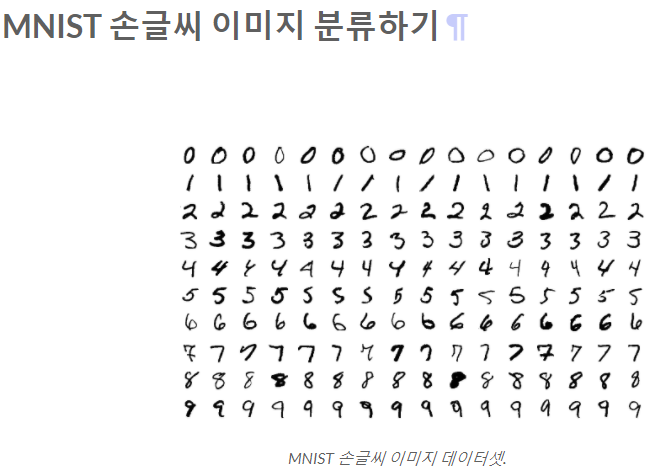

MNIST 데이터셋은 위 그림과 같이 0에서 9까지 10가지로 분류될 수 있는 손글씨 숫자 이미지 70,000개로 이루어져 있습니다.

각 이미지는 28×28 픽셀로 구성되고 각 픽셀은 아래와 같이 0~255 사이의 숫자 행렬로 표현됩니다.

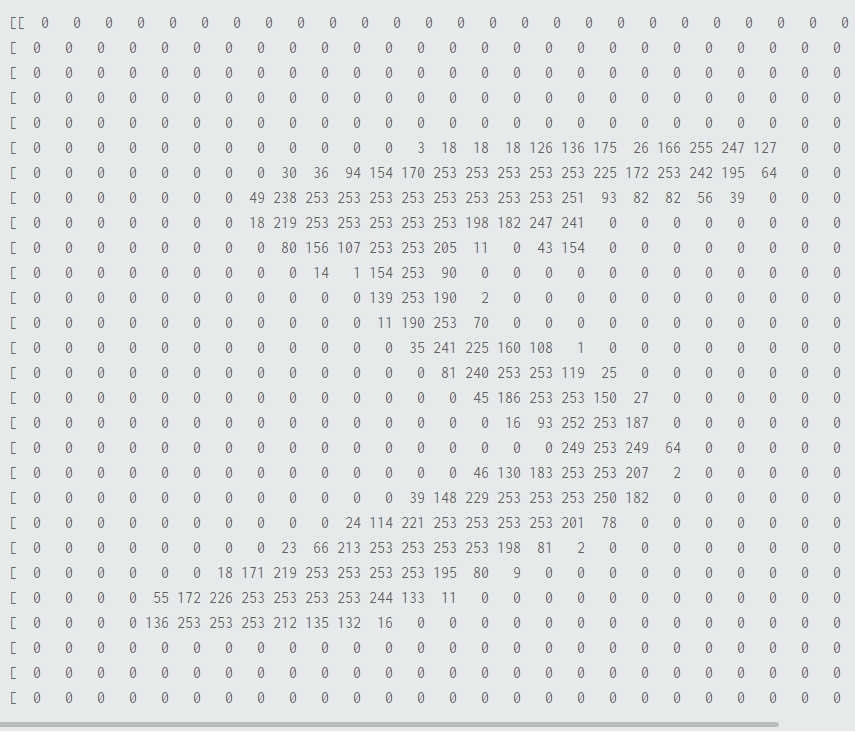

이러한 60,000개의 이미지는 인공 신경망의 훈련 (Training)에 사용되고, 10,000개의 이미지는 테스트 (Test)에 사용됩니다.

이번 페이지에서는 Dense 층들로 구성되는 완전 연결된 인공신경망 (Fully-Connected Neural Network)을 이용해서 MNIST 데이터셋을 분류해 보겠습니다.

# 1.MNIST 모델 개발실습 

In [1]:
#-------------------------------------------------

# 모듈 임포트 (MNIST 딥러닝을 위해 필요한 기능 모듈을 가져온다)
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 2.MNIST 다운로드, 데이터셋 준비(mnist에서 훈련자료 6만개와 시험자료 1만개를 가져온다.)




In [3]:
#-------------------------------------------------
# mnist 다운로드, 데이터셋 준비 (Download, Reshape & Categorical)
#  mnist에서 훈련자료 6만개와 시험자료 1만개를 가져온다.

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# (학습 입력값,결과값 ), (테스트 입력값,결과값 )

11501568/11490434 [==============================] - 0s 0us/step


첫번째 이미지 데이터 확인

In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# 3.총 7만개 중에서 학습용 6만개, 시험용 1만개 샘플을 사용

In [6]:
# 구조 변경하여 가져오기
# 총 7만개 중에서 학습용 6만개, 시험용 1만개 샘플을 사용한다.
# 샘플당 크기는 784Byte, 정수 자료이다.
# 참고로, mnist에서 제공하는 손글씨 샘플 하나당 이미지 크기는 28*28(=784)바이트

X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
#                       6만개  샘플크기,    실수형 변환,   0~1.0 크기로 변경

X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
#                       1만개  샘플크기 ,   실수형  변환,  0~1.0 크기로 변경



# 4.카테고리 클래스 분류(범주형 데이터로 변형)

In [7]:
# 결과(정답) 값에는 0~9까지 숫자 값이 들어가 있다.
# 각 숫자별로 카테고리 클래스 분류를 한다(원핫 인코딩 방식).

# 결과는 클래스 10개 구조인 자료들이다. (예; [1,0,0,0,0,0,0,0,0,0])

# 이 카테고리 클래스 크기 10은 나중에 모델 구성할 단계에서도 사용된다.
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 5.모델 구성 (model.add)

In [8]:
# 모델 구성 (New Model & Add)
model = Sequential() # 순차적인 다층 구조 모델이 가능한 빈 모델 생성 

                       # 각 층은 한 처리부만 존재하고 다음 층에 처리 결과 전달
                       # 한 층에서 여러 처리부를 사용하려면 Graph() 모델 사용.
                       # 단, Graph() 모델은 층 생성 함수가 다르다.     

# relu 선형함수를 이용하여 28*28(784) 클래스 크기를 64 크기로 바꾼다.
#model.add(Dense(output_dim=64, input_dim=28*28, activation='relu'))
model.add(Dense(input_dim=784, activation="relu", units=64)) 
                    # 출력 차원=64, 입력 차원=784, 활성함수='relu'


# softmax 다중분류 함수를 이용하여 클래스 10개 구조로 바꾼다(원핫 인코딩 구조).
#model.add(Dense(output_dim=10, activation='softmax'))
model.add(Dense(activation="softmax", units=10))
                    # 출력 차원=10, 입력 차원=자동계산됨(64), 활성함수='softmax'

In [9]:
# 모델 엮어서 완성 (Compile)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#                     손실 처리=다중분류,      최적화 방법='sgd,   측정 기준=정확도 
#                                                         (sgd: 확률적 경사하강법)

# 6.모델 학습 (Fit)

In [10]:
# 모델 학습 (Fit)
#model.fit(X_train, Y_train, nb_epoch=5, batch_size=32)
model.fit(X_train, Y_train, epochs=5, batch_size=32)
#            입력,  정답 , 전체 5회 반복 , 샘플 32개씩 학습/갱신

Epoch 1/5
1875/1875 [==============================] - 17s 1ms/step - loss: 1.1069 - accuracy: 0.7015
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3668 - accuracy: 0.8990
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3031 - accuracy: 0.9155
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2720 - accuracy: 0.9257
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2566 - accuracy: 0.9299


# 7.모델 사용 평가 (Evaluate) 

In [11]:
# 모델 사용 평가 (Evaluate) 
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
# 손실, 정확도                      테스트 입력 , 정답 , 샘플 32개씩 작업
print("손실 및 정확도:", str(loss_and_metrics ))

313/313 [==============================] - 1s 1ms/step - loss: 0.2277 - accuracy: 0.9370
손실 및 정확도: [0.22767026722431183, 0.9369999766349792]


# 8.모델이용 숫자 예측

In [14]:
# 완성된 모델을 사용해보자 (Predict)
x = X_test[0:1]               # 테스트의 첫 샘플을 가져와 사용해보자. 
y = model.predict_classes(x)  # 기대값이 가장 높은 결과 값 얻음
print("결과:",y)
y = model.predict(x)              # 각 클래스(0~9) 기대값 얻음
print("각 숫자에 대한 가능성:")
print(y)

결과: [7 2]
각 숫자에 대한 가능성:
[[1.8148057e-04 1.8095431e-06 4.1034643e-04 2.3517122e-03 5.2565201e-06
  2.8512031e-05 1.6561974e-07 9.9580956e-01 1.0549035e-04 1.1057593e-03]
 [1.8502469e-03 4.5014840e-06 9.7696769e-01 8.8063283e-03 1.6456269e-08
  7.3366342e-03 2.7367012e-03 9.7814583e-09 2.2978708e-03 1.5721321e-08]]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


결과: 

손실 및 정확도: [0.22523144161850214, 0.9363999962806702] <--93.64%
[7]   <-- 정답 7이 나왔다!
각 숫자에 대한 가능성:
[[5.7013971e-05 1.5977866e-07 2.9202469e-04 1.7521917e-03 6.8809072e-06
  5.1784831e-05 2.1408965e-07 9.9701726e-01 4.1261275e-05 7.8119605e-04]]

빨간색 부분이 숫자 7의 기대값(99.7%)이고 가장 높다.

(0,1,2,3,4,5,6,7,8,9 순서) 

# 9.실제 이미지 화면으로 확인

(784,)


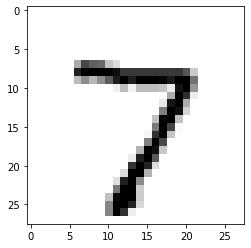

In [16]:
import matplotlib.pyplot as plt
import numpy as np


image = X_test[0]
print(image.shape) # 28*28, 흑백이미지라는 뜻.
image = np.reshape(image, [28, 28])
plt.imshow(image,cmap=plt.cm.binary, interpolation='nearest')




